## 蒙特卡洛预测  First-Visit MC Prediction

### Example 5.1 with Exercises 5.1-5.2 and Figure 5.1

### 二十一点


s： 三元组：
     
      spaces.Discrete(32), 玩家手牌和
      spaces.Discrete(11), 庄家显示的牌 （A-10）
      spaces.Discrete(2), 玩家是否有可用的A
    
a:    
      
      spaces.Discrete(2) 
      
      1:玩家要牌 0:玩家停牌，此时庄家开始要牌

r: 1 0 -1 赢、平局、输

env: 
- 玩家开局获得21点（天和），赢
- 玩家点数超过21点（爆牌），输
- 如果玩家选择停牌，则庄家一直要牌，直到>=17时停牌
- 此时若庄家爆牌， 玩家赢 否则比较谁的点数更接近21定胜负

In [48]:
import blackjack
from blackjack import BlackjackEnv
import numpy as np
from collections import defaultdict


import matplotlib
import plotting
matplotlib.style.use('ggplot')
%matplotlib inline

In [6]:
env = BlackjackEnv()

In [83]:
#首次访问型MC算法
def mc_prediction(env, policy, num_episodes=10, discount_factor=1.0):
    V = defaultdict(float)  #最终得到的估计的value function 状态是三元组，不是数字，用词典
    returns_count = defaultdict(float)
    returns_sum = defaultdict(float)
    
    for i in range(num_episodes):
        s = env.reset()
        #采集样本序列
        episode = []
        
        for t in range(100):
            a = policy(s)
            s_, r, done, info = env.step(a)
            episode.append((s, a, r))
            if done:
                break
            s = s_
            
        states_in_episode = set([tuple(x[0]) for x in episode]) #单独提取每个epsidoe的状态 并去重
        #print(states_in_episode)
        for s in states_in_episode:
            first_occurence_idx = next(i for i,x in enumerate(episode) if x[0] == s) #找出每个状态第一次出现的位置
            G = sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[first_occurence_idx:])]) 
            #自从第一次出现后所获得的所有reward求和
            returns_sum[s] += G
            returns_count[s] += 1.0
            V[s] = returns_sum[s] / returns_count[s]
    return V


In [84]:
def sample_policy(observation):
    """
    A policy that sticks if the player score is >= 20 and hits otherwise.
    """
    score, dealer_score, usable_ace = observation
    return 0 if score >= 20 else 1

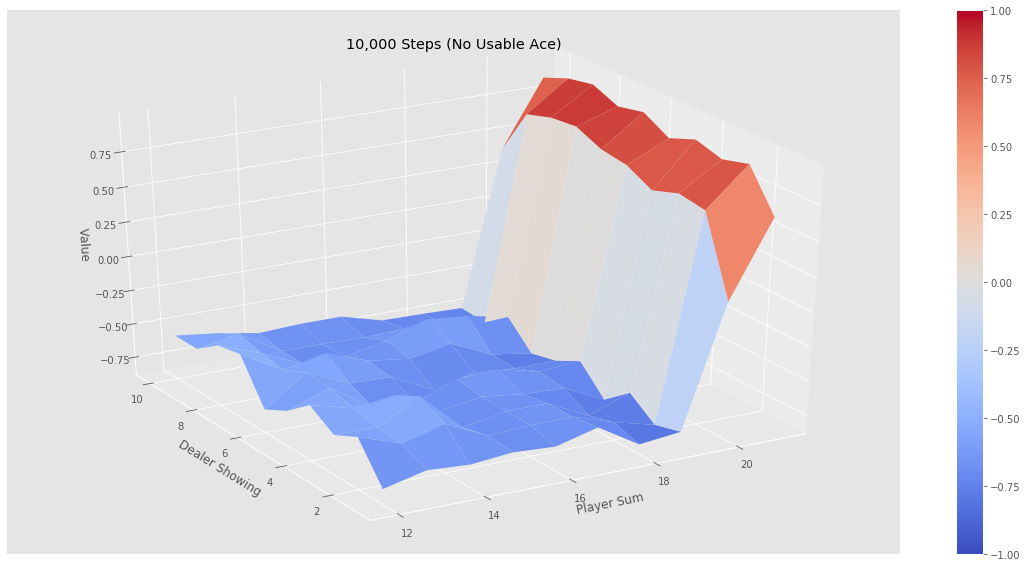

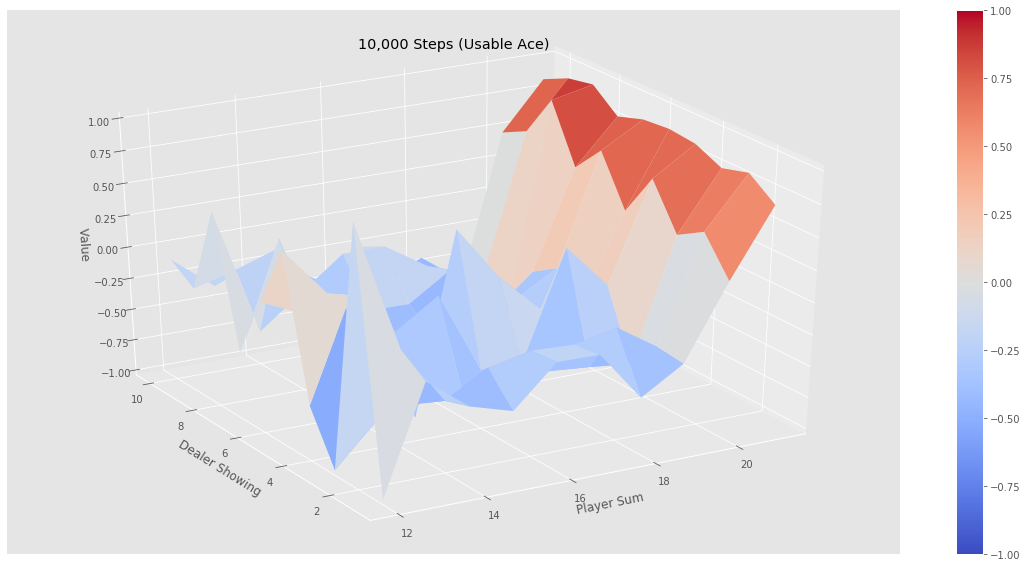

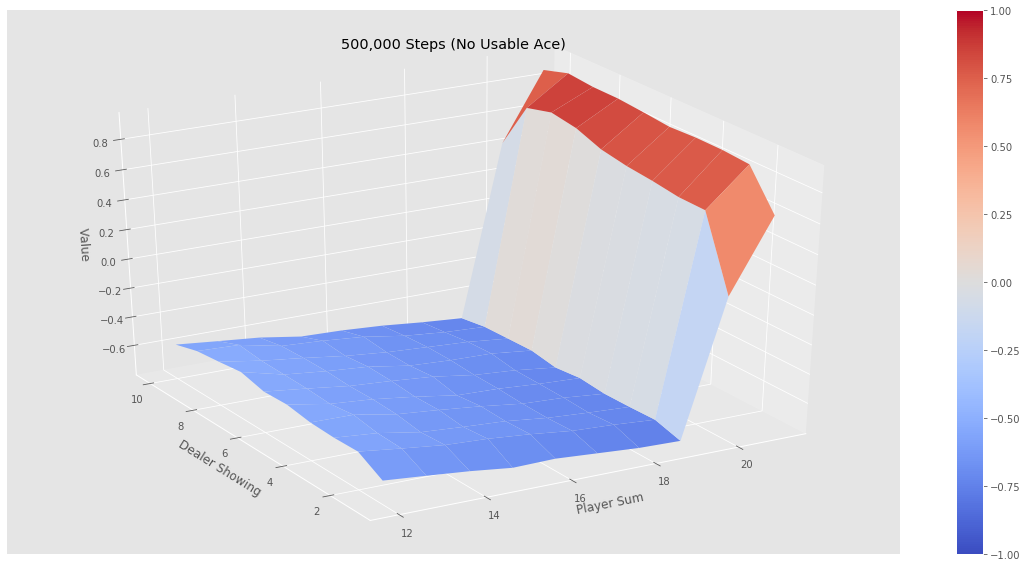

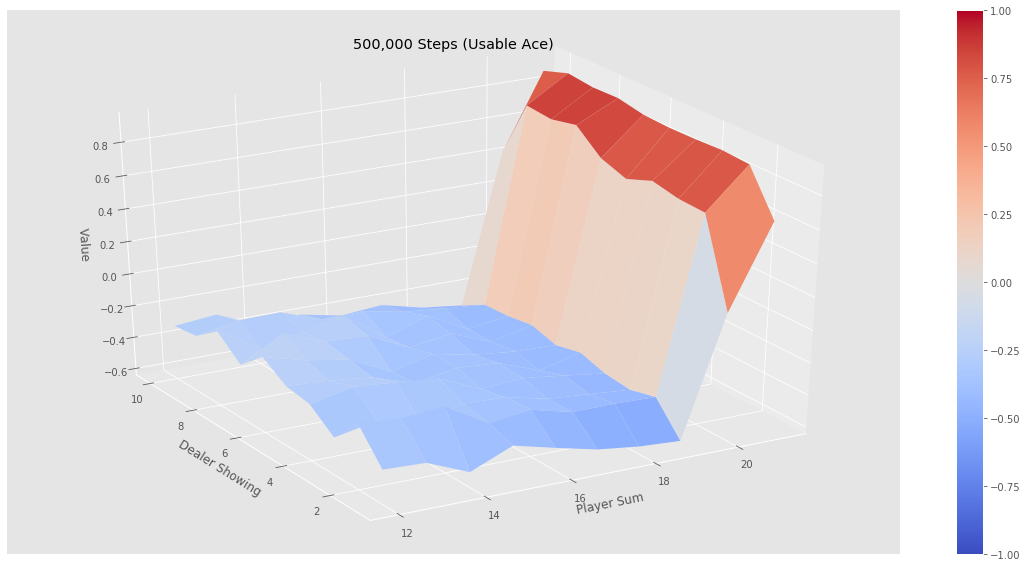

In [85]:
V_10k = mc_prediction(env, sample_policy, num_episodes=10000)
plotting.plot_value_function(V_10k, title="10,000 Steps")

V_500k = mc_prediction(env, sample_policy, num_episodes=500000)
plotting.plot_value_function(V_500k, title="500,000 Steps")

In [98]:
#每次访问型MC算法
def mc_prediction(env, policy, num_episodes=10, discount_factor=1.0):
    V = defaultdict(float)  #最终得到的估计的value function 状态是三元组，不是数字，用词典
    returns_count = defaultdict(float)
    returns_sum = defaultdict(float)
    
    for i in range(num_episodes):
        s = env.reset()
        #采集样本序列
        episode = []
        
        for t in range(100):
            a = policy(s)
            s_, r, done, info = env.step(a)
            episode.append((s, a, r))
            if done:
                break
            s = s_
            
        states_in_episode = set([tuple(x[0]) for x in episode]) #单独提取每个epsidoe的状态 并去重
        
        for s in states_in_episode:
            G = 0
            s_count = 0 #记录一个episode中当前s出现的次数
            for idx,x in enumerate(episode):
                if x[0] == s:
                    G += sum([x[2]*(discount_factor**i) for i,x in enumerate(episode[idx:])])
                    s_count += 1
                    
            G = G/s_count 
            #自从第一次出现后所获得的所有reward求和
            returns_sum[s] += G
            returns_count[s] += 1.0
            V[s] = returns_sum[s] / returns_count[s]
        
    return V

In [102]:
V = mc_prediction(env, sample_policy, num_episodes=10000)

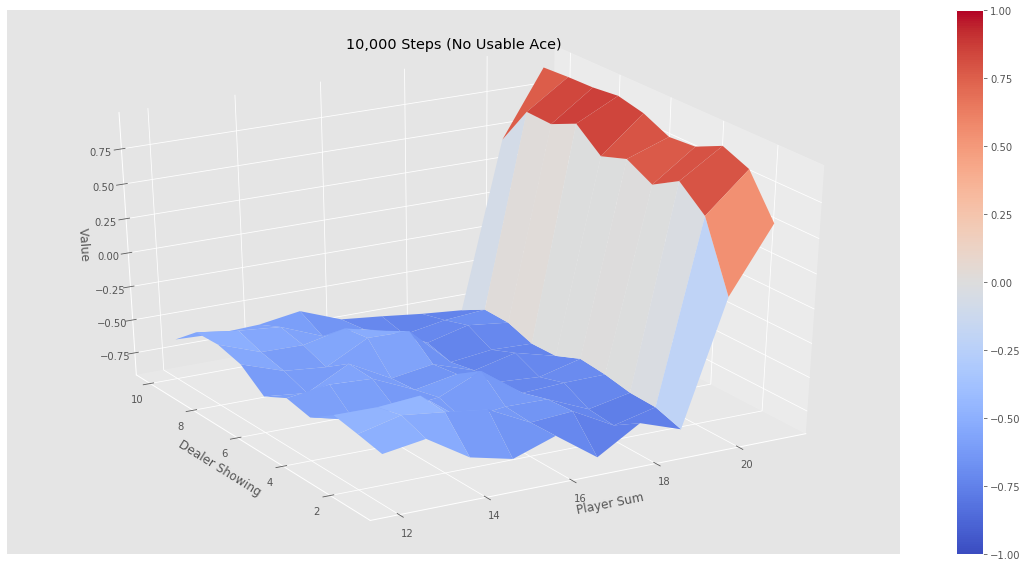

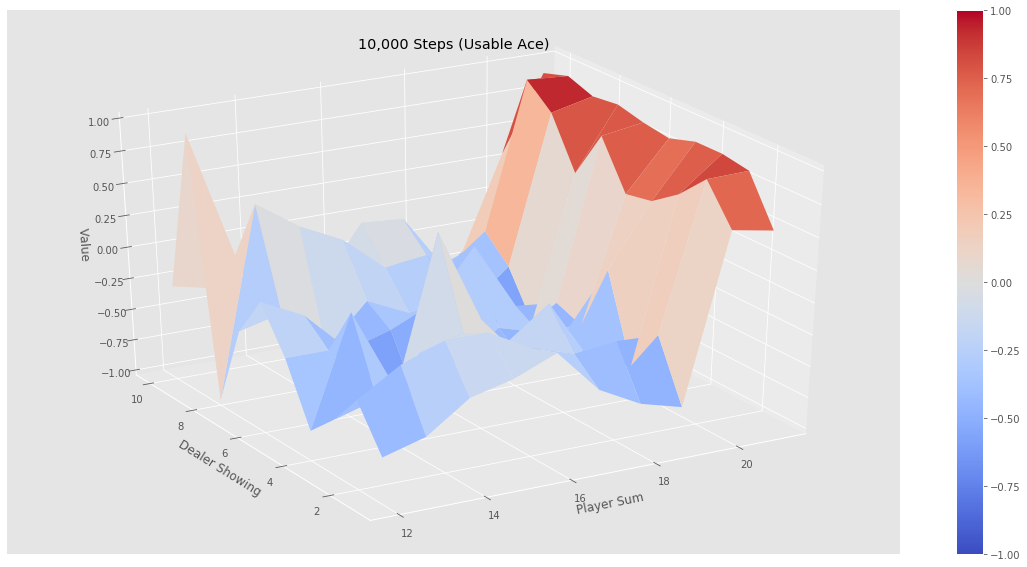

In [105]:
plotting.plot_value_function(V, title="10,000 Steps")
